In [1]:
print(__doc__)

import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd

Automatically created module for IPython interactive environment


In [2]:
# Generate sample data
X = np.sort(5 * np.random.rand(40, 1), axis=0)
y = np.sin(X).ravel()

In [10]:
y

array([ 0.95214631,  0.07562254,  0.22400658,  0.30514753,  0.38547526,
       -0.3627219 ,  0.85220919,  0.96222276,  0.974547  ,  0.98876635,
       -0.41107697,  0.95236659,  0.93112389,  0.93102474,  0.84528417,
        0.98918605,  0.77290186,  0.71547335,  0.64664371,  0.46360697,
        1.17982921,  0.24866039,  0.22865952,  0.11874668,  0.09435171,
        0.06551191, -0.08062993, -0.12772808, -0.12826344, -0.27852017,
       -0.54722749, -0.40253508, -0.62937038, -0.73757949, -0.8593655 ,
       -1.13162283, -0.91186944, -0.92902322, -0.98361769, -0.99959895])

In [7]:
# Add noise to targets
y[::5] += 3 * (0.5 - np.random.rand(8))

array([ 0.95214631,  0.07562254,  0.22400658,  0.30514753,  0.38547526,
       -0.3627219 ,  0.85220919,  0.96222276,  0.974547  ,  0.98876635,
       -0.41107697,  0.95236659,  0.93112389,  0.93102474,  0.84528417,
        0.98918605,  0.77290186,  0.71547335,  0.64664371,  0.46360697,
        1.17982921,  0.24866039,  0.22865952,  0.11874668,  0.09435171,
        0.06551191, -0.08062993, -0.12772808, -0.12826344, -0.27852017,
       -0.54722749, -0.40253508, -0.62937038, -0.73757949, -0.8593655 ,
       -1.13162283, -0.91186944, -0.92902322, -0.98361769, -0.99959895])

In [9]:
# Fit regression model
#espison permit to take more points in the model = > if epsilon=0 
#he pass perfectly by the points.
svr_rbf = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)
svr_lin = SVR(kernel='linear', C=100, gamma='auto')
svr_poly = SVR(kernel='poly', C=100, gamma='auto', degree=3, epsilon=.1,
               coef0=1)
y_rbf = svr_rbf.fit(X, y).predict(X)
y_lin = svr_lin.fit(X, y).predict(X)
y_poly = svr_poly.fit(X, y).predict(X)

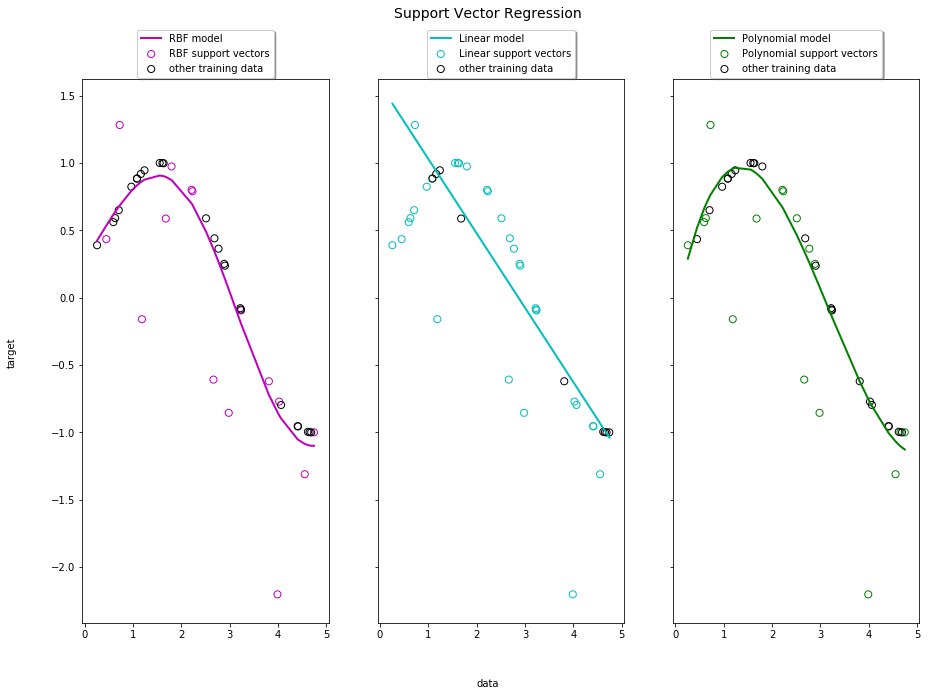

In [10]:
lw = 2

svrs = [svr_rbf, svr_lin, svr_poly]
kernel_label = ['RBF', 'Linear', 'Polynomial']
model_color = ['m', 'c', 'g']

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 10), sharey=True)
for ix, svr in enumerate(svrs):
    axes[ix].plot(X, svr.fit(X, y).predict(X), color=model_color[ix], lw=lw,
                  label='{} model'.format(kernel_label[ix]))
    axes[ix].scatter(X[svr.support_], y[svr.support_], facecolor="none",
                     edgecolor=model_color[ix], s=50,
                     label='{} support vectors'.format(kernel_label[ix]))
    axes[ix].scatter(X[np.setdiff1d(np.arange(len(X)), svr.support_)],
                     y[np.setdiff1d(np.arange(len(X)), svr.support_)],
                     facecolor="none", edgecolor="k", s=50,
                     label='other training data')
    axes[ix].legend(loc='upper center', bbox_to_anchor=(0.5, 1.1),
                    ncol=1, fancybox=True, shadow=True)

fig.text(0.5, 0.04, 'data', ha='center', va='center')
fig.text(0.06, 0.5, 'target', ha='center', va='center', rotation='vertical')
fig.suptitle("Support Vector Regression", fontsize=14)
plt.show()

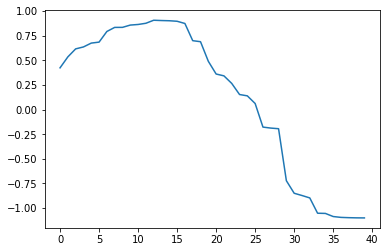

In [29]:
sb.lineplot([i for i in range(len(X))],svr_rbf.predict(X))
#svr_rbf.predict(X+1)

'Gustavo'